# PHY 321 Final Exam - The Double Pendulum

## By Andrew Koren

The Double Pendulum was our classes first example of a non-analytical system. Up until that point, we had taken simple systems such as springs, objects flying through the air, and the classic, analytical pendulum and broken them down to equations of motion and parameterized paths. Then we stuck a pendulum to the pendulum.

At first, it didn't look too far off from anything we've done before. In PHY 183 we connected springs to each other, so what's wrong with a pendulum? When the topic was introduced, we saw an animation that looked something like this:

![this is a double pendulum btw](doublepe.gif) [(from wolfram)](https://scienceworld.wolfram.com/physics/DoublePendulum.html)

Yeah, that doesn't look like any function we've seen before. The difference between this path and the ones we'd seen up until then was that this one didn't look like it was made of sines and cosines, nor any polynomials or something that can be parameterized. Just by attaching a second pendulum, we go from analytical to 'what the heck is that?' 

This system doesn't have a ton of parts, no fancy potentials or oscillating drivers, but it is still very difficult to predict how it will behave. It's so simple that many other systems probably have one in it. Things like ropes, tree branches, limbs, trebuchet, and even inflatable-arm-waving-tube-man have two nodes with two angles at some point. One of the common examples I've seen is golf swings. Modeling the double-pendulum helps us understand all of these things.

Considering these factors, I believe it is important to see what can be done to model the double pendulum: what can we predict from initial conditions, are there times where it is or isn't chaotic, and how effective is numerical modeling? This project will attempt to answer some of those questions

Background

The double pendulum, as well as the normal pendulum and many other systems like them, fall into the domain of classical mechanics. These systems are primarily dictated by the forces and dynamics we humans work with every day. The system can be understood as forces pushing and pulling on things, gaining and loosing energy, accelerating and decelerating as they travel through time and move through space. 

Newtonain mechanics describes such systems primarily through forces, such as gravitational force, and uses those to describe how the object moves. In the double-pendulum, the only forces pressent are gravity and the tension between each node of the pendulum. The net force on an object determine it's acceleration and, given some initial conditions, can describe how a system moves and behaves if known. Since the force of gravity is quite simple, understanding how the tension behaves as a function of position and time is all we need.

Unlike gravity, the force of tension isn't as explicit as $F=-mg\hat y$. It doesn't always pull down, but instead depends on the angle the nodes of the pendulum make with each other and the anchor. For another thing, what is it's strength? The forces in this situation must be derived from a constraint equation. Assuming the pendulum is rigid, it must always be true that the first node of the pendulum is some distance $l$ from its anchor, and the two nodes of the double pendulum are some length $l_2$ apart from each other. As such, the forces involved must be such that the two aren't allowed to separate any further than that distance. 

Considering that the forces in this problem are primarily dependant on the constraints put onto the system, it would be nice to use a form of classical mechanics that doesn't require everything to be translated to forces only to be translated back. This can be done using Lagrangian mechanics, which describes the world through the energies involved with positions and velocities in space. 

Lagrangaian mechanics are based around the Lagrangian $L$

$$
L = T - U
$$

Where T is the kinetic energy of the system and U is the potential energy. Notice that there are no explicit forces here. Instead, we derive formulas for how mass stores energy in the system. If we know the velocity (which goes into KE) and position (which goes into U) of our mass, our lagrangian will helps us find our equation of motion.

Since our pendulums have a definite length, each one is stuck to a single degree of freedom. We know exactly where their center of mass is if we know the angle they make with the vertical

$$
cm_1 = \begin{pmatrix} \frac{l}{2} \sin \theta_1 \\ -\frac{l}{2} \cos \theta_1 \end{pmatrix} \\
cm_2 = \begin{pmatrix} l\sin \theta_1 + \frac{l}{2} \sin \theta_1\\ - l\cos \theta_2 - \frac{l}{2} \cos \theta_2 \end{pmatrix}
$$

Which is depicted in this drawing

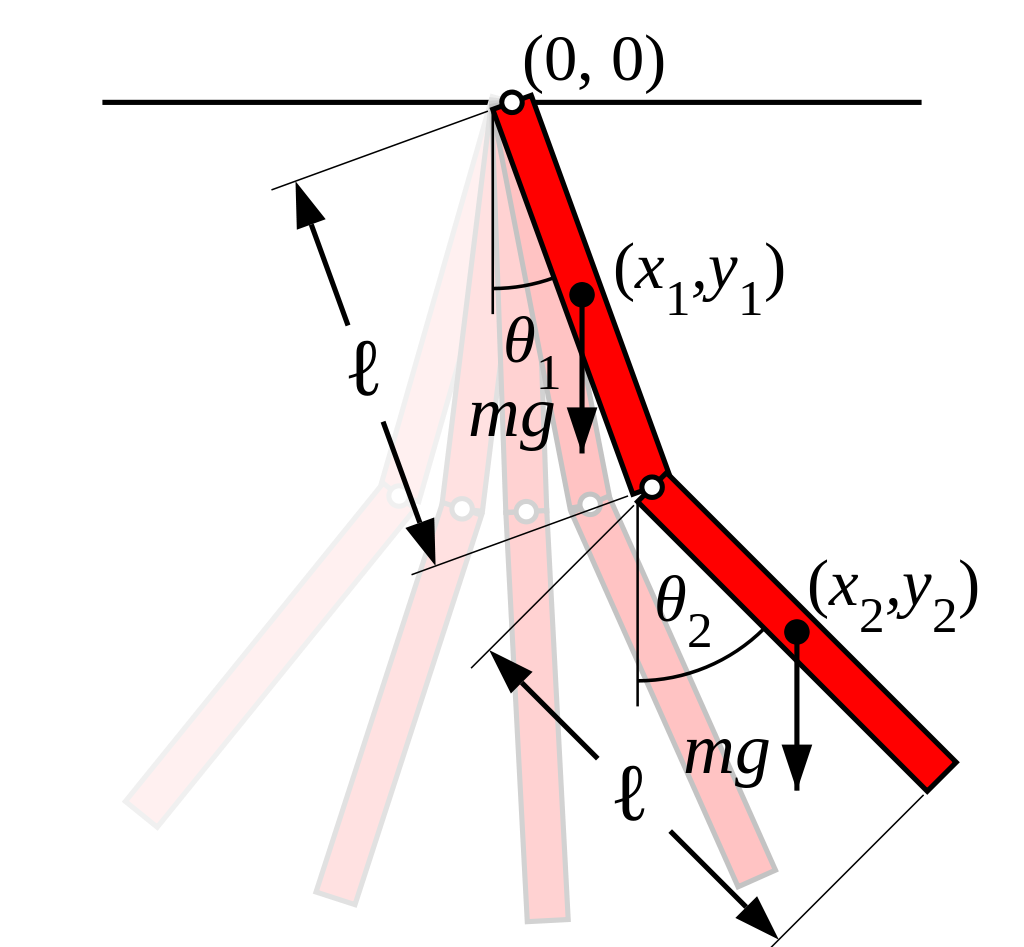 [From wikipedia](https://en.wikipedia.org/wiki/Double_pendulum)

The added terms for $cm_2$ point out the fact that the second pendulum behaves like the first only with its anchor dispaced by the first pendulum. Using these equations, we have the potential as a function of angle, and by taking the derivative of these constraints with respect to time, we can write the kinetic energy as a function of angle (and angular velocity). The derivation of these is located in the Equations of motion section of the jupyter notebook I've submitted.



This yields the lagrangian

$$
L = \frac{m}{6}l^2 \left(4\dot\theta_1^2 + \dot \theta_2^2 + 3 \dot \theta_1 \dot \theta_2 \cos(\theta_1 - \theta_2) \right) + \frac{m}{2} gl(3\cos \theta_1 + \cos \theta_2)
$$

Notice that kinetic energy depends not only on the rate of change of both angles, but also where the pendulums are located. This comes from the fact that the second pendulum moves faster when it moves with the other pendulum. The value of the lagrangian itself doesn't mean too much to us. What we'd really like is an equation which tells us how velocity changes as the system evolves. This is where the Euler-Lagrange equation comes into play. It states

$$
\frac{d}{dt}\frac{\partial L}{\partial\dot \theta_i} = \frac{\partial L}{\partial\theta_i}
$$

Which can be interpreted as the rate of change of momentum due to change in some angle $\theta_i$ is equal to the rate of change of the lagrangian due to the change in angle $\theta_i$

If we were to consider the case where all the mass of the pendulums is stored in a bob attached to the end of the pendulum, this would yield the equations of motion 

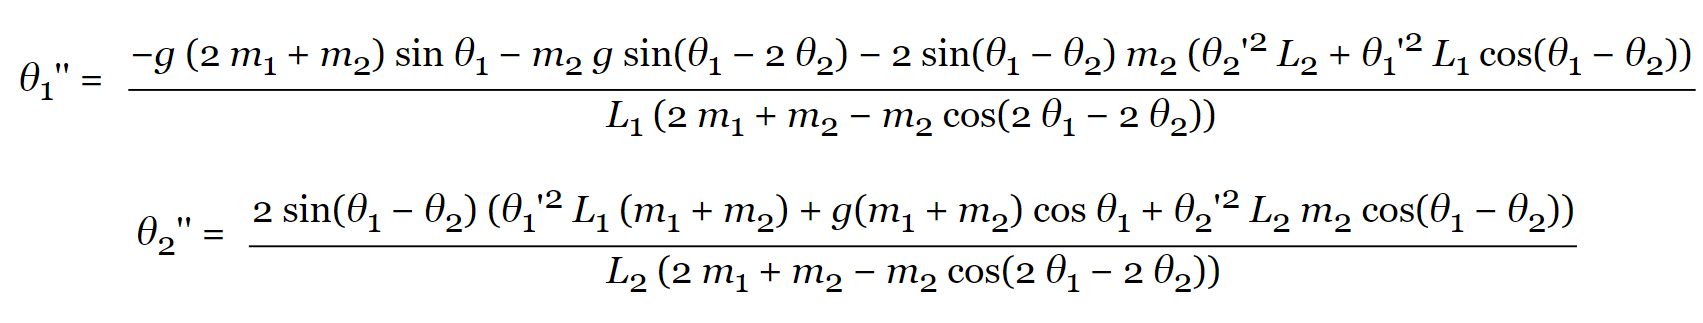

This result is not easy to obtain by hand, although programs such as Mathematica can spit the result out given the lagrangian. My efforts to do so by hand are also in the jupyter notebook, but in the end I had to use mathematica since the equations are coupled.

Since we now know the position, change in position (velocity), and change in velocity for any point which the double-pendulum can reach, we now know exxactly how the pendulum behaves... perhaps. To see this in action, we'll have to put this equation of motion in motion.



Methods

These equations of motion aren't exactly intuitive, which makes sense. Considering the random-looking path of the double pendulum at the top of this pdf, it shouldn't look like it boils down to some simple oscillations or other basic curves. Our end goal is to implement the EOM numerically, which will yield the most visually pleasing results, but from this point we should see if there's any insight that can be learned about the function just by looking at it written out. 

Its hard to pick apart this equation, so let's start with using some simplifications 

First note that for $\ddot \theta_1$, using $m_2=0$ returns our normal pendulum

$$
\ddot \theta_1 = \frac{-2gm_1 \sin \theta_1}{2L_1m_1}= \frac{-g}{L_1} \sin \theta_1
$$

But the same isn't true for $\ddot \theta_2$ when $m_1=0$

$$
\ddot \theta_2 = \frac{2\sin(\theta_1-\theta_2)(\dot \theta_1^2 L_1m_2+gm_2\cos(\theta_1)+\dot \theta_2^2 L_2 m_2 \cos (\theta_1 - \theta_2))}{L_2(m_2 - m_2 \cos(2\theta_1-2\theta_2))} =\frac{2\sin(\theta_1-\theta_2)(\dot \theta_1^2 L_1+g\cos(\theta_1)+\dot \theta_2^2 L_2 \cos (\theta_1 - \theta_2))}{L_2(1 - \cos(2\theta_1-2\theta_2))}
$$

This comes from the fact that the location of the second pendulum's mass still depends on the position of the first pendulum. When $\theta_1 = \theta_2$, this yields $\frac{0}{0}$, so this isn't exactly physical. The system breaks down when it's allowed to swing arond something that is massless

when $m_1 =0$, $\ddot \theta_1$ yields a similar result, 

$$
\ddot \theta_1 = \frac{m_2(-g \sin \theta_1 - g \sin(\theta_1 - 2\theta_2)-2\sin(\theta_1-\theta_2)(\dot \theta_2^2L_2 + \dot \theta_1^2 L_1 \cos(\theta_1-\theta_2)))}{m_2L_1(1-\cos(2\theta_1-2\theta_2))} %= \frac{-g}{L_1}\frac{\sin\theta_1 + \sin(\theta_1 - \theta_2)}{1-\cos(2\theta_1-2\theta_2)}-\frac{2\sin(\theta_1-\theta_2)(\dot \theta_2^2L_2 + \dot \theta_1^2 L_1 \cos(\theta_1-\theta_2)))}{m_2L_1(1-\cos(2\theta_1-2\theta_2))} 
$$

Where we again divide by zero when $\theta_1=\theta_2$

It makes sense that this isn't physical, since massless rope generally isn't easy to model (think whip-cracking).

The main equation has many of these terms which are 'turned on' when each pendulum is parallel or orthogonal. Here's a few of them:

When they are parallel, the denomonator has no $m_2$ component, and when they are antiparallel, the rate of change of both pendulums is dividied by a factor of $+2m_2$ instead. This comes from the total moment of inertia increasing (slow down) or decreasing (speed up).

Due to the $\sin(\theta_1-\theta_2)$ term, acceleartion is increased/decreased greater when the two pendulums are orthogonal to eachother. This tends to turn on terms related to the rate of change of the opposite pendulum. When pendulum 1 is swinging fast and is perpendicular to pendulum 2, it exerts a force of acceleration on pendulum 2, and vise versa.

The $\cos(\theta_1-\theta_2)$ term turns on acceleration $\ddot \theta_2$ due to its own velocity $\dot \theta_2 ^2$. When the both of the pendulums are parallel, in order for pendulum 2 to rotate it must drag along pendulum 1 and exert a froce on it. The same is true for pendulum 1 on 2.

From these we can understand under what circumstances each pendulum will speed up and slow down. You can see this in action by watchin the above animation and noting what happens when the two pendulums are parallel or perpendicular. I have a slowed down version of the gif below

![slowed down double pendulum](doublepe_slow.gif)

Now that we have this intuition, lets get into our numerical results!

The code used to generate each result is located in the attached jupyter notebook. To save space, I've made each plot a visualization of the pendulum itself. I tried making line graphs of angle vs time, but it was difficult to tell what one pendulum was doing in isolation and the results were just pointy lines.

To implement the double-pendulum's equations of motion, I used an implementation by Diego Assencio. His website and github are linked in the code notebook.

Numerical solvers can be used to depict this system in ways which equations alone cannot. By breaking down how the acceleration EOMs change the velocities of each pendulum into tiny steps, one can effectively model how the position, velocity, and acceleration changes over time. Numerical solvers aren't necessarily as accurate as analytical solutions, but for our purposes they are extremely effective, and error drops quickly as our time step size decreases. 

Considering the rather complex motion of the pendulum, we'll use a numerical solver which has conservation of energy, just as the system itself has conservation of energy. Assencio's implementation uses the classic Runge-Kutta method (RK4), which calculates rate of change at the start point, the end point, and the middle of the two (twice!) in each time step, correcting the slope accordingly with each calculation in order to yield the most accurate time step.

By reading and saving the position of the pendulums and iterating time steps, we can track the movement of the pendulum and graph it, which can be used to characterize the pendulum based on various initial conditions. In the jupyter notebook, my generalized coordinates are angles, so I use a helper function to plot the points in 2D Cartesian space

Presentation of Results

For my first plot, I wanted to show off the wild motion that a double pendulum can have. I started the pendulum straigh down $\theta_1 = \theta_2 = 0$, but gave each one opposite velocities. The rest of the constants were kept simple: mass = 1, length =1, $g=9.81$. The initial angular velocities were $10$ rad/s and $-10$ rad/s for the first and second pendulum

![initially straight down with initial velocities](2Pendulum-1.gif) 

The x and y axis are bounded by the sum of the max length of the pendulum. Note what I previously mentioned about the pendulums being parallel and perpendicular still apply.


I tested to make sure that the RK4 numerical method conserves energy, as shown in the plot on the right. 

So far I've only talked about what it takes to model the double pendulum, but now that we have a functioning model, we can bring up a new topic: chaos. Part of the reason non-analytical systems like these are hard to model is that their behavior can vary wildly if there is a slight change to their initial conditions. Lets test if a minor change in initial conditions yields a massive change in outcome, which will show that the system is chaotic

![chaos of 3 pendulums](chaos-1.gif)

The only difference between the three pendulums is in the initial velocity of the second pendulum, $0.01 \pm 0.0001$ rad/s, a 1% difference.

These pendulums separate slightly after a little bit of time, but by $t=8$ they've diverged and move in completely different directions. This isn't due to them being started off at an unstable critical point and pushed in opposite directions; their divergence is directly connect to the difficulty in predicting how the model moves from the outset.

To help show that these are really quite different, I've included the kinetic energy as bar graphs on the right. After some time the three bars are entirely uncorrelated

Considering our exploration of the pendulum when one of the masses was zero looked like it would have a divide by zero error, what if we tried to simplify the system a different way? By setting the length of the first pendulum to 0.0001, it starts to look very similar to a typical pendulum. With a normal pendulum, period is independent of velocity, so they should all oscillate with constant period. If this isn't the case, the system is still chaotic

This time initial velocities will be $0.1 \pm 0.001$. For a simple pendulum, this means there's enough energy to continuously swing counterclockwise.

![three pendulums where L1 is small](maybe_chaos.gif)

It did not take long at all to break away from the simple pendulum model. Not only do all three pendulums change direction, but there's pattern to which direction they spin. If there is a away to produce periodic oscillation, changing the lenght of pendulum 1 alone will not do it.

Interestingly, kinetic energy is a bit more correlated. This is likely due to the fact that the pendulum will have to make a full swing, so its kinetic energy must oscillate between maximum and minimum, yielding little time for variation in only 15 seconds.

From looking at some online resources [(like this)](https://www.myphysicslab.com/pendulum/double-pendulum-en.html), it appears there is one case where the pendulum oscillates periodically. Thanks to the small-angle approximation, the EOMs lose their sines and cosines and oscillate similarly to a double-spring system or the springdulum, as shown below.

![sines and cosines](simple.gif)

Using an initial conditions $\dot \theta_1 = 1$, $\dot \theta_2 = -1$, we we can plot a lissajous curve for the double pendulum. This compares the angles of each pendulum to each other, and reveals a nice, sinusoidal curve. This is because the unique features of the sines and cosines of the double pendulum are removed. The EOMs themselves are quotients of the positions and velocities of the two pendulums.

The maximum angular displacement for $\theta_1$ is $0.209$ radians, and $0.292$ radians for $\theta_2$, which is sufficient for the small-angle approximation

Describing the system.

When the small-angle approximation is not in affect, the double pendulum is a chaotic system. In this case, chaotic implies that it is 1. difficult to predict future values based on initial conditions, and 2. yields vastly different results if initial conditions are changed slightly. To make this assertion, I have shown several cases where chaotic behavior is present, and attempted to make various simplifications that might yield more predictable behavior all still yield chaos. 

From the equation of motion derived from the euler-lagrange equations, we see that while removing the mass from the second pendulum reduces the problem to that of the simple pendulum, removing mass from the first or decreasing it greatly does not yield any such simplifications.

By comparing the paths of the double pendulum through a variety of conditions in our animated plots, we see that trying to reduce the system by looking at the limit when the length of the first pendulum is near zero still yields unpredictable results. 

There is a case where the double pendulum is predictable rather than chaotic, which is when the small angle approximation reduces the system to one where sines and cosines do not cause quite as unique patterns.

Throughout this project I have implemented and explained both analytical and numerical methods as means to characterize the system. The seemingly daunting EOMs found directly from the euler-lagrange equation can be separated using computational resources, so that we can find the acceleration of each pendulum without needing the acceleration of the other. Considering the prevalence of double-pendulum-like systems and chains in general, it is good that even if an analytical solution doesn't necessarily exist, breaking down equations of motion qualitatively. 

Numerical computation can create paths which cannot typically be described by parameterized equations, and create valuble depictions of data, such as animations, which help illustrate the real world behaviour of the system.